In [ ]:
!pip install qiskit
!pip install qiskit.ignis --no-cache-dir
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 4.8 MB/s 
     |████████████████████████████████| 19.2 MB 1.4 MB/s 
     |████████████████████████████████| 240 kB 53.0 MB/s 
     |████████████████████████████████| 106 kB 24.8 MB/s 
     |████████████████████████████████| 55 kB 420 kB/s 
     |████████████████████████████████| 49 kB 3.2 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 943 kB 46.1 MB/s 
     |████████████████████████████████| 50 kB 3.7 MB/s 
     |████████████████████████████████| 4.0 MB 40.6 MB/s 
     |████████████████████████████████| 1.9 MB 43.5 MB/s 
     |████████████████████████████████| 112 kB 40.1 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.3-py3-none-any.whl size=12262 sha256=cd54eea87bd9fbba70c41a1528568d65e0c5f4a2410465eff8032ea3a56c9ae4
  Stored in directory: /root/.cache/pip/wheels/b1/36/b2/6eb4e

In [ ]:
!pip install qiskit.ignis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from qiskit import *
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error

#Noise model function

In [ ]:
def get_noise(p):
  error_measure = pauli_error([('X', p), ('I', 1-p)])

  noise_model = NoiseModel()

  #apply measurement error to noise model
  noise_model.add_all_qubit_quantum_error(error_measure, 'measure')

  return noise_model

#Create Noise Model

In [ ]:
#1% chance of happening measurement error
noise_model = get_noise(0.01)

#Effect of noise model

#00 01 10 11

In [ ]:
all_state = ['00', '01', '10', '11']

for state in all_state:
  qc =QuantumCircuit(2,2)

  if state[0] == '1':
    qc.x(1)
  if state[1] == '1':
    qc.x(0)

  qc.measure([0,1], [0,1])

  simulator = Aer.get_backend('aer_simulator')
  t_tc = transpile(qc, simulator)
  qobj = assemble(t_tc, shots=10000)
  counts = simulator.run(qobj, noise_model=None).result().get_counts()
  print(state + ' becomes', counts)

00 becomes {'00': 10000}
01 becomes {'01': 10000}
10 becomes {'10': 10000}
11 becomes {'11': 10000}


#Run with noise

In [ ]:
all_state = ['00', '01', '10', '11']

for state in all_state:
  qc =QuantumCircuit(2,2)

  if state[0] == '1':
    qc.x(1)
  if state[1] == '1':
    qc.x(0)

  qc.measure([0,1], [0,1])

  simulator = Aer.get_backend('aer_simulator')
  t_tc = transpile(qc, simulator)
  qobj = assemble(t_tc, shots=10000)
  counts = simulator.run(qobj, noise_model=noise_model).result().get_counts()
  print(state+ ' becomes', counts)

00 becomes {'10': 102, '00': 9809, '01': 89}
01 becomes {'10': 1, '00': 101, '01': 9791, '11': 107}
10 becomes {'01': 2, '00': 110, '10': 9782, '11': 106}
11 becomes {'01': 98, '11': 9816, '00': 1, '10': 85}


#Create general state

In [ ]:
#create circuit
qc = QuantumCircuit(2,2)

#apply gates
qc.h(0)
qc.cx(0, 1)

#apply measurement
qc.measure([0,1], [0,1])

#qc.draw(initial_state=True, output='mpl)

t_tc = transpile(qc, simulator)
qobj = assemble(t_tc, shots=10000)
counts = simulator.run(qobj, noise_model=noise_model).result().get_counts()
print(counts)

{'01': 93, '11': 4790, '10': 109, '00': 5008}


#Error mitigation in qiskit

In [ ]:
#import libraries

from qiskit import *
from qiskit.visualization import array_to_latex
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit.visualization import plot_histogram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  """


#Creating calibration circuit

In [ ]:
qr = QuantumRegister(2)
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

#Visualize calibration circuits

In [ ]:
for circuit in meas_calibs:
  print('Circuit', circuit.name)
  print(circuit)
  print()

Circuit mcalcal_00
        ░ ┌─┐   
q17_0: ─░─┤M├───
        ░ └╥┘┌─┐
q17_1: ─░──╫─┤M├
        ░  ║ └╥┘
 c0: 2/════╩══╩═
           0  1 

Circuit mcalcal_01
       ┌───┐ ░ ┌─┐   
q17_0: ┤ X ├─░─┤M├───
       └───┘ ░ └╥┘┌─┐
q17_1: ──────░──╫─┤M├
             ░  ║ └╥┘
 c0: 2/═════════╩══╩═
                0  1 

Circuit mcalcal_10
             ░ ┌─┐   
q17_0: ──────░─┤M├───
       ┌───┐ ░ └╥┘┌─┐
q17_1: ┤ X ├─░──╫─┤M├
       └───┘ ░  ║ └╥┘
 c0: 2/═════════╩══╩═
                0  1 

Circuit mcalcal_11
       ┌───┐ ░ ┌─┐   
q17_0: ┤ X ├─░─┤M├───
       ├───┤ ░ └╥┘┌─┐
q17_1: ┤ X ├─░──╫─┤M├
       └───┘ ░  ║ └╥┘
 c0: 2/═════════╩══╩═
                0  1 



#Run on simulator without noise

In [ ]:
  simulator = Aer.get_backend('aer_simulator')

  t_tc = transpile(meas_calibs, simulator)
  qobj = assemble(t_tc, shots=10000)
  cal_results = simulator.run(qobj, noise_model=None).result()

#Calibration matrix without noise

In [ ]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

<IPython.core.display.Latex object>

#Create noise model

In [ ]:
#10% chance of happening measurement error
noise_model = get_noise(0.1)

#Run calibration circuit with noise

In [ ]:
simulator = Aer.get_backend('aer_simulator')

t_tc = transpile(meas_calibs, simulator)
qobj = assemble(t_tc, shots=10000)
cal_results = simulator.run(qobj, noise_model=noise_model).result()

#Noise calibration matrix

In [ ]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

<IPython.core.display.Latex object>

#Arbitrary general circuit to get noisy results from noise model

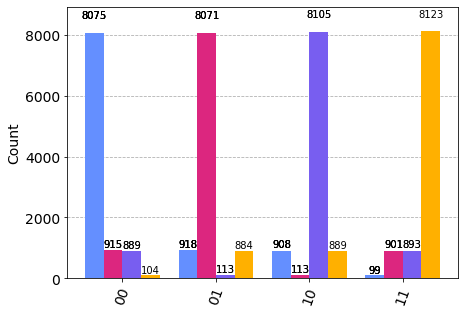

In [ ]:
general_circuit = QuantumCircuit(2,2)
general_circuit.h(0)
general_circuit.cx(0, 1)
general_circuit.measure([0,1], [0,1])

simulator = Aer.get_backend('aer_simulator')

t_tc = transpile(meas_calibs, simulator)
qobj = assemble(t_tc, shots=10000)
noisy_results = simulator.run(qobj, noise_model=noise_model).result()
noisy_counts = noisy_results.get_counts()
plot_histogram(noisy_counts)



#MItigate noise for the circuit with the help of noisy calibration circuit

In [ ]:
#Get the fitter object
meas_fitter = meas_fitter.filter

#Results with mitigation
mitigated_results = meas_fitter.apply(noisy_results)
mitigated_counts = mitigated_results.get_counts()

#Plot noisy and mitigated results for the circuit

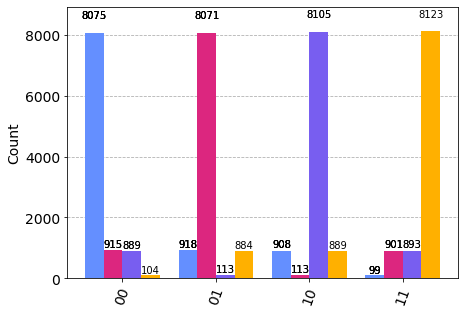

In [ ]:
plot_histogram(noisy_counts)

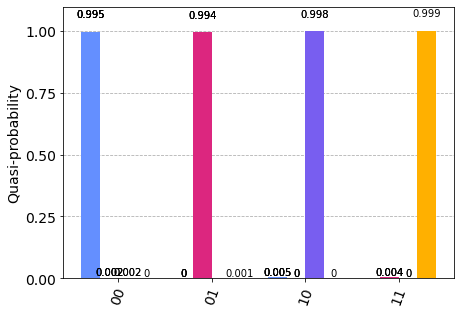

In [ ]:
plot_histogram(mitigated_counts)

#Create another 2 qubit arbitary general circuit

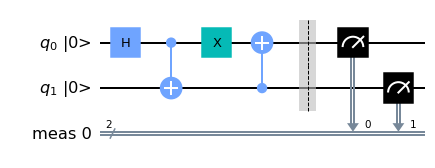

In [ ]:
general_circuit2 = QuantumCircuit(2)
general_circuit2.h(0)
general_circuit2.cx(0, 1)
general_circuit2.x(0)
general_circuit2.cx(1,0)

general_circuit2.measure_all()

general_circuit2.draw(initial_state=True, output='mpl')



#Run on simulator

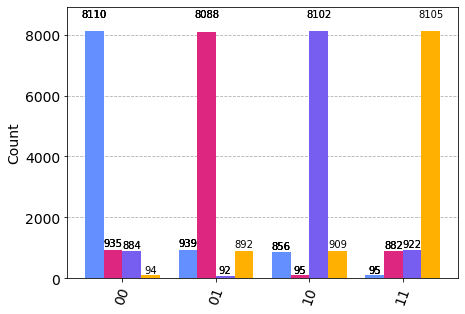

In [ ]:
simulator = Aer.get_backend('aer_simulator')

t_tc = transpile(meas_calibs, simulator)
qobj = assemble(t_tc, shots=10000)
noisy_results = simulator.run(qobj, noise_model=noise_model).result()
noisy_counts = noisy_results.get_counts()
plot_histogram(noisy_counts)